# COVID-19 INDIA : Analysis of Tests done & Statewise Analysis

     This dataset is provided by https://api.rootnet.in/
     @rajansharma

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from matplotlib import ticker 
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import json, requests

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [341]:
df_india_test = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest","totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})

In [342]:
df_india_test.drop(df_india_test.index[[9,28,32,34]], inplace = True)

    Manually imputing the missing values using other sources (Wikipedia,Worldometers)

In [343]:
df_india_test.loc[11,'c_positive'] = 1024
df_india_test.loc[12,'c_positive'] = 1251
df_india_test.loc[33,'c_positive'] = 19156
df_india_test.loc[37,'c_positive'] = 25338
df_india_test.loc[38,'c_positive'] = 26945
df_india_test.loc[39,'c_positive'] = 28506
df_india_test.loc[40,'c_positive'] = 30379
df_india_test.loc[41,'c_positive'] = 32117
df_india_test.loc[42,'c_positive'] = 33918
df_india_test.loc[43,'c_positive'] = 36312
df_india_test.loc[44,'c_positive'] = 38754
df_india_test.loc[45,'c_positive'] = 39980

In [344]:
df_india_test["p2t_ratio"]= np.round(100*df_india_test["c_positive"]/df_india_test["c_tests"],2)
df_india_test["positive"] = df_india_test["c_positive"].diff()
df_india_test["tests"] = df_india_test["c_tests"].diff()
df_india_test["p2t_ratio"]= np.round(100*df_india_test["positive"]/df_india_test["tests"],2)
df_india_test["test_per_million"]= np.round(1000000*df_india_test["c_tests"]/1300000000,2)
df_india_test["positive_per_million"]= np.round(1000000*df_india_test["c_positive"]/1300000000,2)

df_india_test = df_india_test[1:]

In [347]:
df_india_test.head()

,day,source,c_individualtest,c_positive,c_tests,p2t_ratio,positive,tests,test_per_million,positive_per_million
1,2020-03-18,ICMR_website_update_18March_6PM_IST.pdf,12235.0,150.0,13125.0,1.09,72.0,6625.0,10.10,0.12
2,2020-03-19,ICMR_website_update_19March_6PM_IST.pdf,13285.0,182.0,14175.0,3.05,32.0,1050.0,10.90,0.14
3,2020-03-20,ICMR_website_update_20March_6PM_IST.pdf,14514.0,236.0,15404.0,4.39,54.0,1229.0,11.85,0.18
4,2020-03-21,ICMR_website_update_21March_6PM_IST.pdf,16021.0,315.0,16911.0,5.24,79.0,1507.0,13.01,0.24
5,2020-03-22,ICMR_website_update_22March_6PM_IST.pdf,17237.0,396.0,18127.0,6.66,81.0,1216.0,13.94,0.30


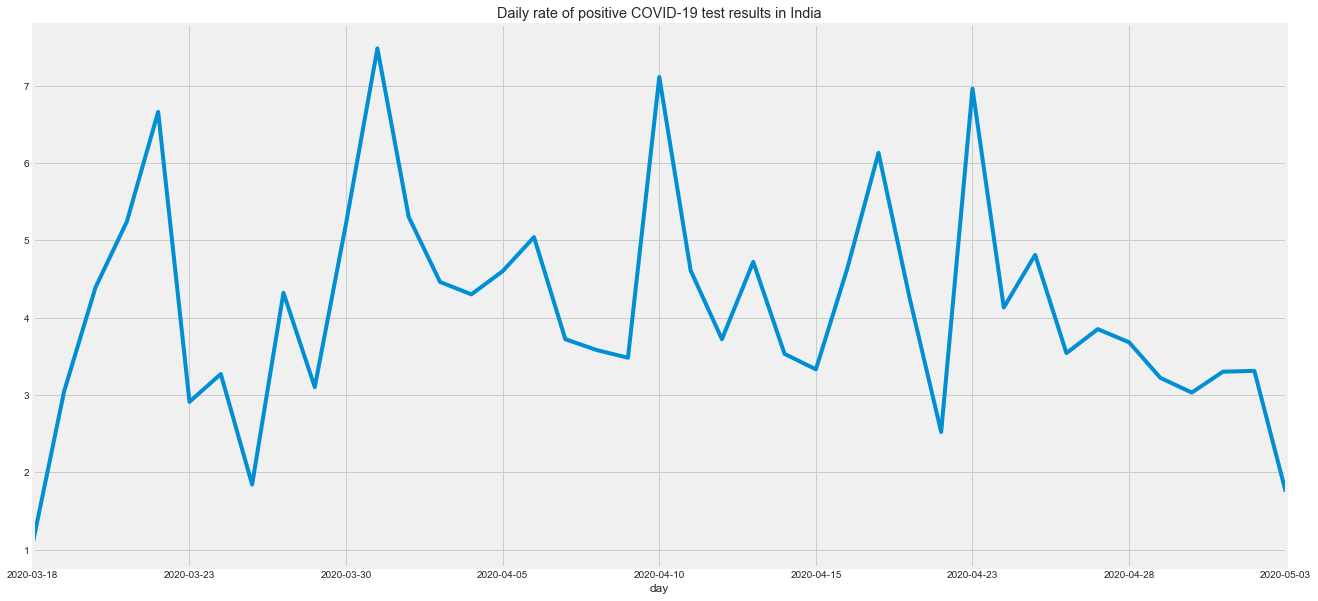

In [348]:
ax = df_india_test.set_index('day').p2t_ratio.plot(figsize=(20,10),title='Daily rate of positive COVID-19 test results in India')

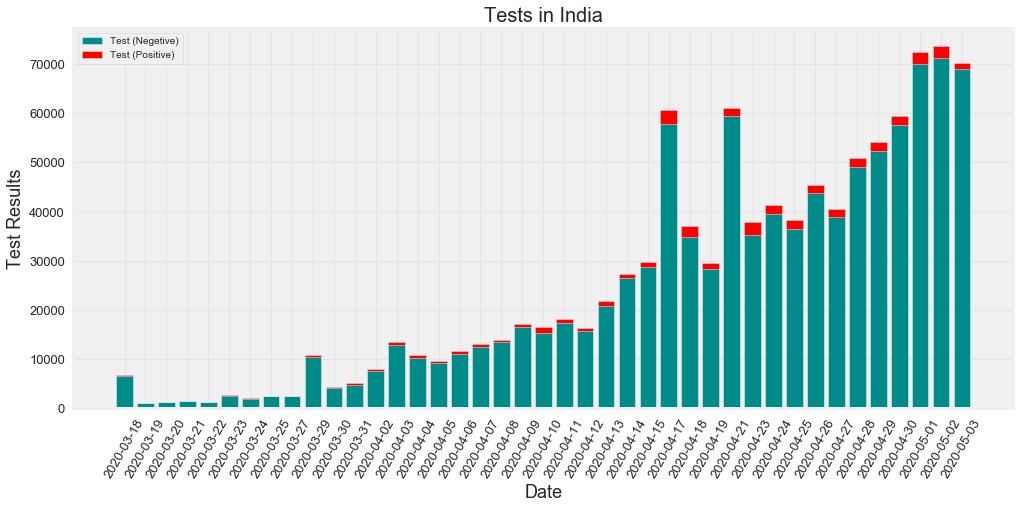

In [349]:
f = plt.figure(figsize=(15,7))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_india_test["day"],df_india_test["tests"].values[:],color="darkcyan",label="Test (Negetive)"+str())
plt.bar(df_india_test["day"],df_india_test["positive"].values[:],bottom=df_india_test["tests"].values[:]-df_india_test["positive"].values[:],color="Red",label="Test (Positive)")
plt.tick_params(size=5,labelsize = 13)
plt.tick_params(axis="x",size=5,labelsize = 13,labelrotation=60 )
plt.xlabel("Date",fontsize=18)
plt.ylabel("Test Results",fontsize=18)

plt.title("Tests in India",fontsize=20)
plt.grid(alpha=0.3)
plt.legend()

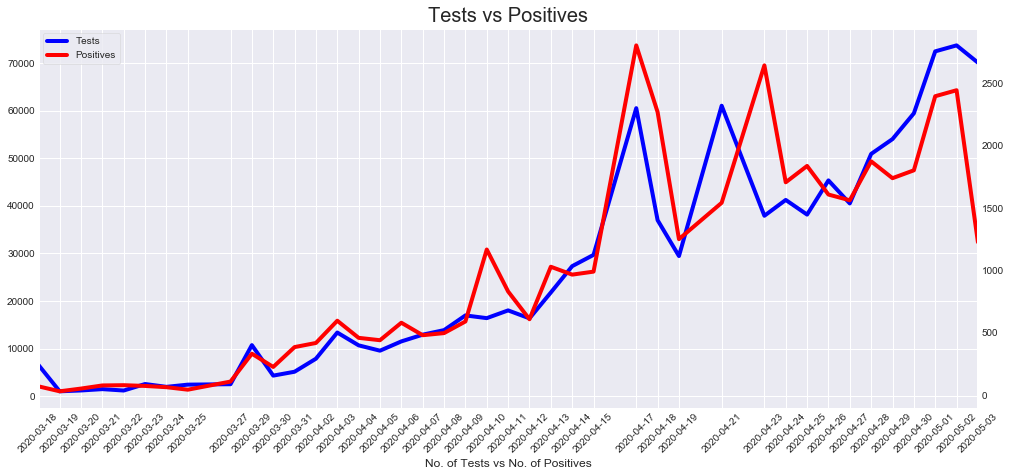

In [350]:
sns.set_style("dark")
plt.figure(figsize=(15,7))
plt.xlabel('No. of Tests vs No. of Positives')

ax1 = df_india_test.tests.plot(color='blue', grid=True, label='Tests')
ax2 = df_india_test.positive.plot(color='red', grid=True, secondary_y=True, label='Positives')

ax1.set_xticks(df_india_test.index)
ax1.set_xticklabels(df_india_test.day, rotation=45)


plt.legend(h1+h2, l1+l2, loc=2)
plt.title("Tests vs Positives",fontsize=20)
plt.show()

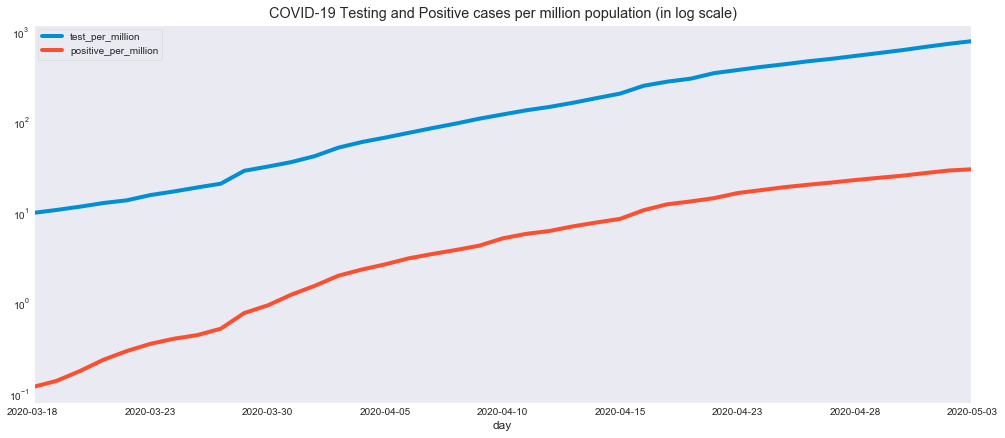

In [351]:
df_india_test[['day','test_per_million','positive_per_million']].set_index('day').plot(figsize=(15,7),title='COVID-19 Testing and Positive cases per million population (in log scale)',logy=True)

## Total tests done till  1st April 2020 in India 

In [352]:
df_india_test["c_tests"][-1:].values[0]

1046450.0

## Test Conducted per Million People

In [288]:
np.round(1000000*df_india_test["c_tests"][-1:].values[0]/1300000000,2)

804.96

## Total individuals tested as of 24 April 2020 in India

In [289]:
df_india_test["c_individualtest"][36]

525667.0

## Stateweise Analysis - WIP

In [353]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [354]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],2)
df_t["Recovery Rate (per 100)"] = np.round(100*df_t["recovered"]/df_t["confirmed"],2)
df_t.style.background_gradient(cmap='Purples',axis=1)

,active,confirmed,deaths,recovered,Mortality Rate (per 100),Recovery Rate (per 100)
Total,27749,40019,1325,10941,3.31,27.34


In [355]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),2)
df_india["Recovery Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["recovered"]/df_india["confirmed"]),2)
df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .background_gradient(cmap='YlGn',subset=["Recovery Rate (per 100)"])

,active,confirmed,deaths,recovered,Mortality Rate (per 100),Recovery Rate (per 100)
state,,,,,,
Maharashtra,9775,12296,521,2000,4.24,16.27
Gujarat,3896,5054,262,896,5.18,17.73
Delhi,2802,4122,64,1256,1.55,30.47
Madhya Pradesh,2013,2788,151,624,5.42,22.38
Rajasthan,1489,2832,70,1273,2.47,44.95
Tamil Nadu,1387,2757,29,1341,1.05,48.64
Uttar Pradesh,1746,2487,43,698,1.73,28.07
Andhra Pradesh,1062,1583,33,488,2.08,30.83
Telangana,533,1061,29,499,2.73,47.03


In [293]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})

In [294]:
a = df_confirmed[df_confirmed.country == 'India'].T
b = df_deaths[df_deaths.country == 'India'].T

ind = pd.concat([a,b], axis=1)
ind.columns = ['confirmed','deaths']
ind = ind[4:]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000185C33C3BA8>,
      dtype=object)

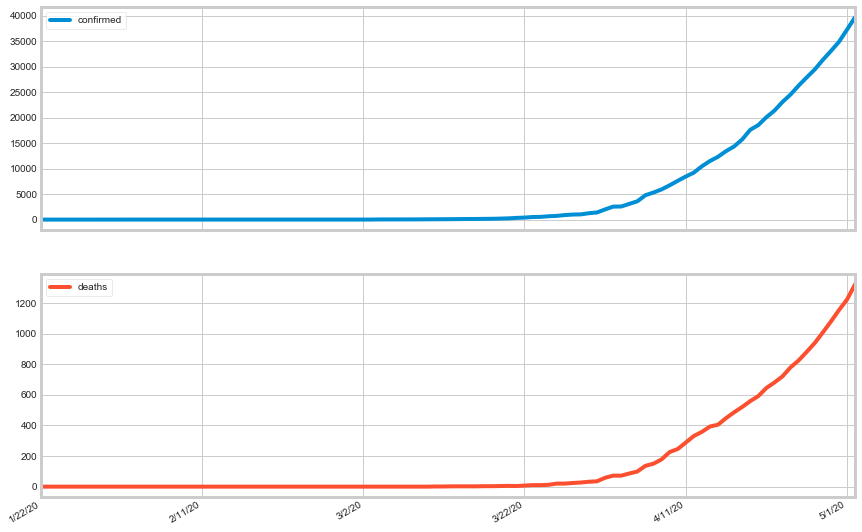

In [301]:
sns.set_style("whitegrid")
ind.plot.line(subplots=True,figsize=(13,10))

In [371]:
#Harvard Data
har_ind = pd.read_csv('data-ETpRr.csv')
har_ind.tail()

,Date,Total cases,Total Recovered,Total Death
58,28-Apr,31332,7696.0,1007.0
59,29-Apr,33050,8325.0,1074.0
60,30-Apr,35043,8889.0,1147.0
61,01-May,37336,9951.0,1218.0
62,02-May,39980,10633.0,1301.0


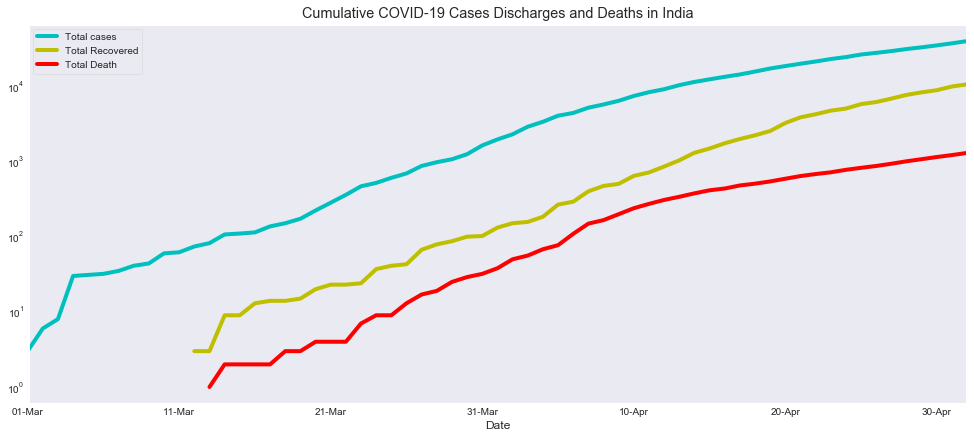

In [372]:
har_ind.set_index('Date').plot(figsize=(15,7),color = ['c', 'y','r'],title='Cumulative COVID-19 Cases Discharges and Deaths in India',logy=True)